In [16]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import linear_model
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

__author__ = 'amanda'

# Load the face feature matrix
feature_arr = pd.read_csv('allFeatures.csv')
# Remove the irrelevant information
del feature_arr['dataset']
del feature_arr['img_num']


# Do PCA to decorrelate the data
explained_variance = 0.99
pca = PCA(n_components=explained_variance, whiten='True')
new_featureArray = pca.fit_transform(feature_arr)
print 'The number of PCs needed to retain %.3f variance is %d.' \
      % (explained_variance, new_featureArray.shape[1])

The number of PCs needed to retain 0.990 variance is 6.


In [17]:
pca_score = pca.explained_variance_ratio_

In [3]:
pca_score.shape

(6,)

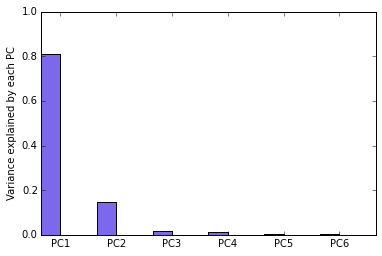

In [18]:
# Prepare data
y = pca_score
N = y.shape[0]  # number of data entries
x = np.arange(N)  # the x locations for the groups
width = 0.35  # bar width

fig, ax = plt.subplots()

rect = ax.bar(x, y, # data
              width, # bar width
              color = 'MediumSlateBlue',  # bar color
               error_kw = {'ecolor':'Tomato',
                          'linewidth':2})
axes = plt.gca()
axes.set_ylim([0,1])  # y-axis bounds


# Add some text for labels.
ax.set_xticks(x+width)
ax.set_xticklabels(('PC1','PC2','PC3','PC4','PC5','PC6'))
plt.ylabel('Variance explained by each PC')
# plt.title('Variance explained by each PC')
plt.savefig('PCA_variance.png')
plt.show()

In [10]:
plt.savefig('PCA.png')